# Dataset Selection for STA 135 Project

*You will analyze a data set of your choosing from one of the above three data sets, using some techniques from multivariate data analysis such as LDA, QDA, PCA or factor analysis.*

*Some things to include should be:*
  - *Visualization of the data sets before applying the techniques.*
  - *Applying some techniques discussed in class to analyze the data set. In your report, you need to provide detailed analysis based on the R outputs. For example, if you are using PCA, what are the PCs? How many PCs you want to choose? Can I interpret the PCs and use them for ranking? For another example, if you are using LDA/QDA, which method do you choose? What is the decision boundary? What is the confusion matrix? Does the splitting of training and test data sets affect my results?*

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
from rpy2.robjects import pandas2ri
import rpy2.robjects as robjects
import pandas as pd


def convert_r_to_pandas(
        lib: str, data: str, set_index: bool = False
    ) -> pd.DataFrame:
    """
    Convert R data to a pandas DataFrame.
    
    :param lib The library name.
    :param data The data name.
    :param set_index: Whether the dataset contains row labels that should be 
        set as the DataFrame index.
    :return: A pandas DataFrame containing the data.
    """

    pandas2ri.activate()

    robjects.r(f"library({lib})")
    robjects.r(f"data({data})")

    r_df = robjects.r(f"as.data.frame({data})")
    df = pd.DataFrame(r_df)
    df = df.T
    df.columns = list(r_df.colnames)
    if set_index:
        df.index = list(r_df.rownames)

    return df

## Data set one: Glass Identification Database

The data set can be obtained from the R package `mlbench`. More specifically, after installing the package, you can obtain the data sets by running

```r
library(mlbench)
data(Glass)
```

For this data set, people are usually interested in predict the glass type from chemical properties.

***Dataset description**: A data frame with 214 observation containing examples of the chemical analysis of 7 different types of glass. The problem is to forecast the type of class on basis of the chemical analysis. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence (if it is correctly identified!).*

See [the documentation](https://www.rdocumentation.org/packages/mlbench/versions/2.1-6/topics/Glass).

In [3]:
glass = convert_r_to_pandas(lib = "mlbench", data = "Glass")
glass["Type"] = glass["Type"].astype("category")
print(glass.shape)
glass.head()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package 'mlbench' was built under R version 4.4.3 



(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [6]:
# Multi-class classification problem

y = glass["Type"]
X = glass.drop(columns=["Type"])

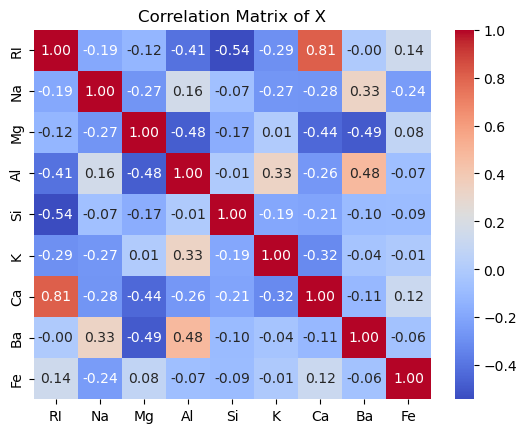

In [7]:
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of X")
plt.show()

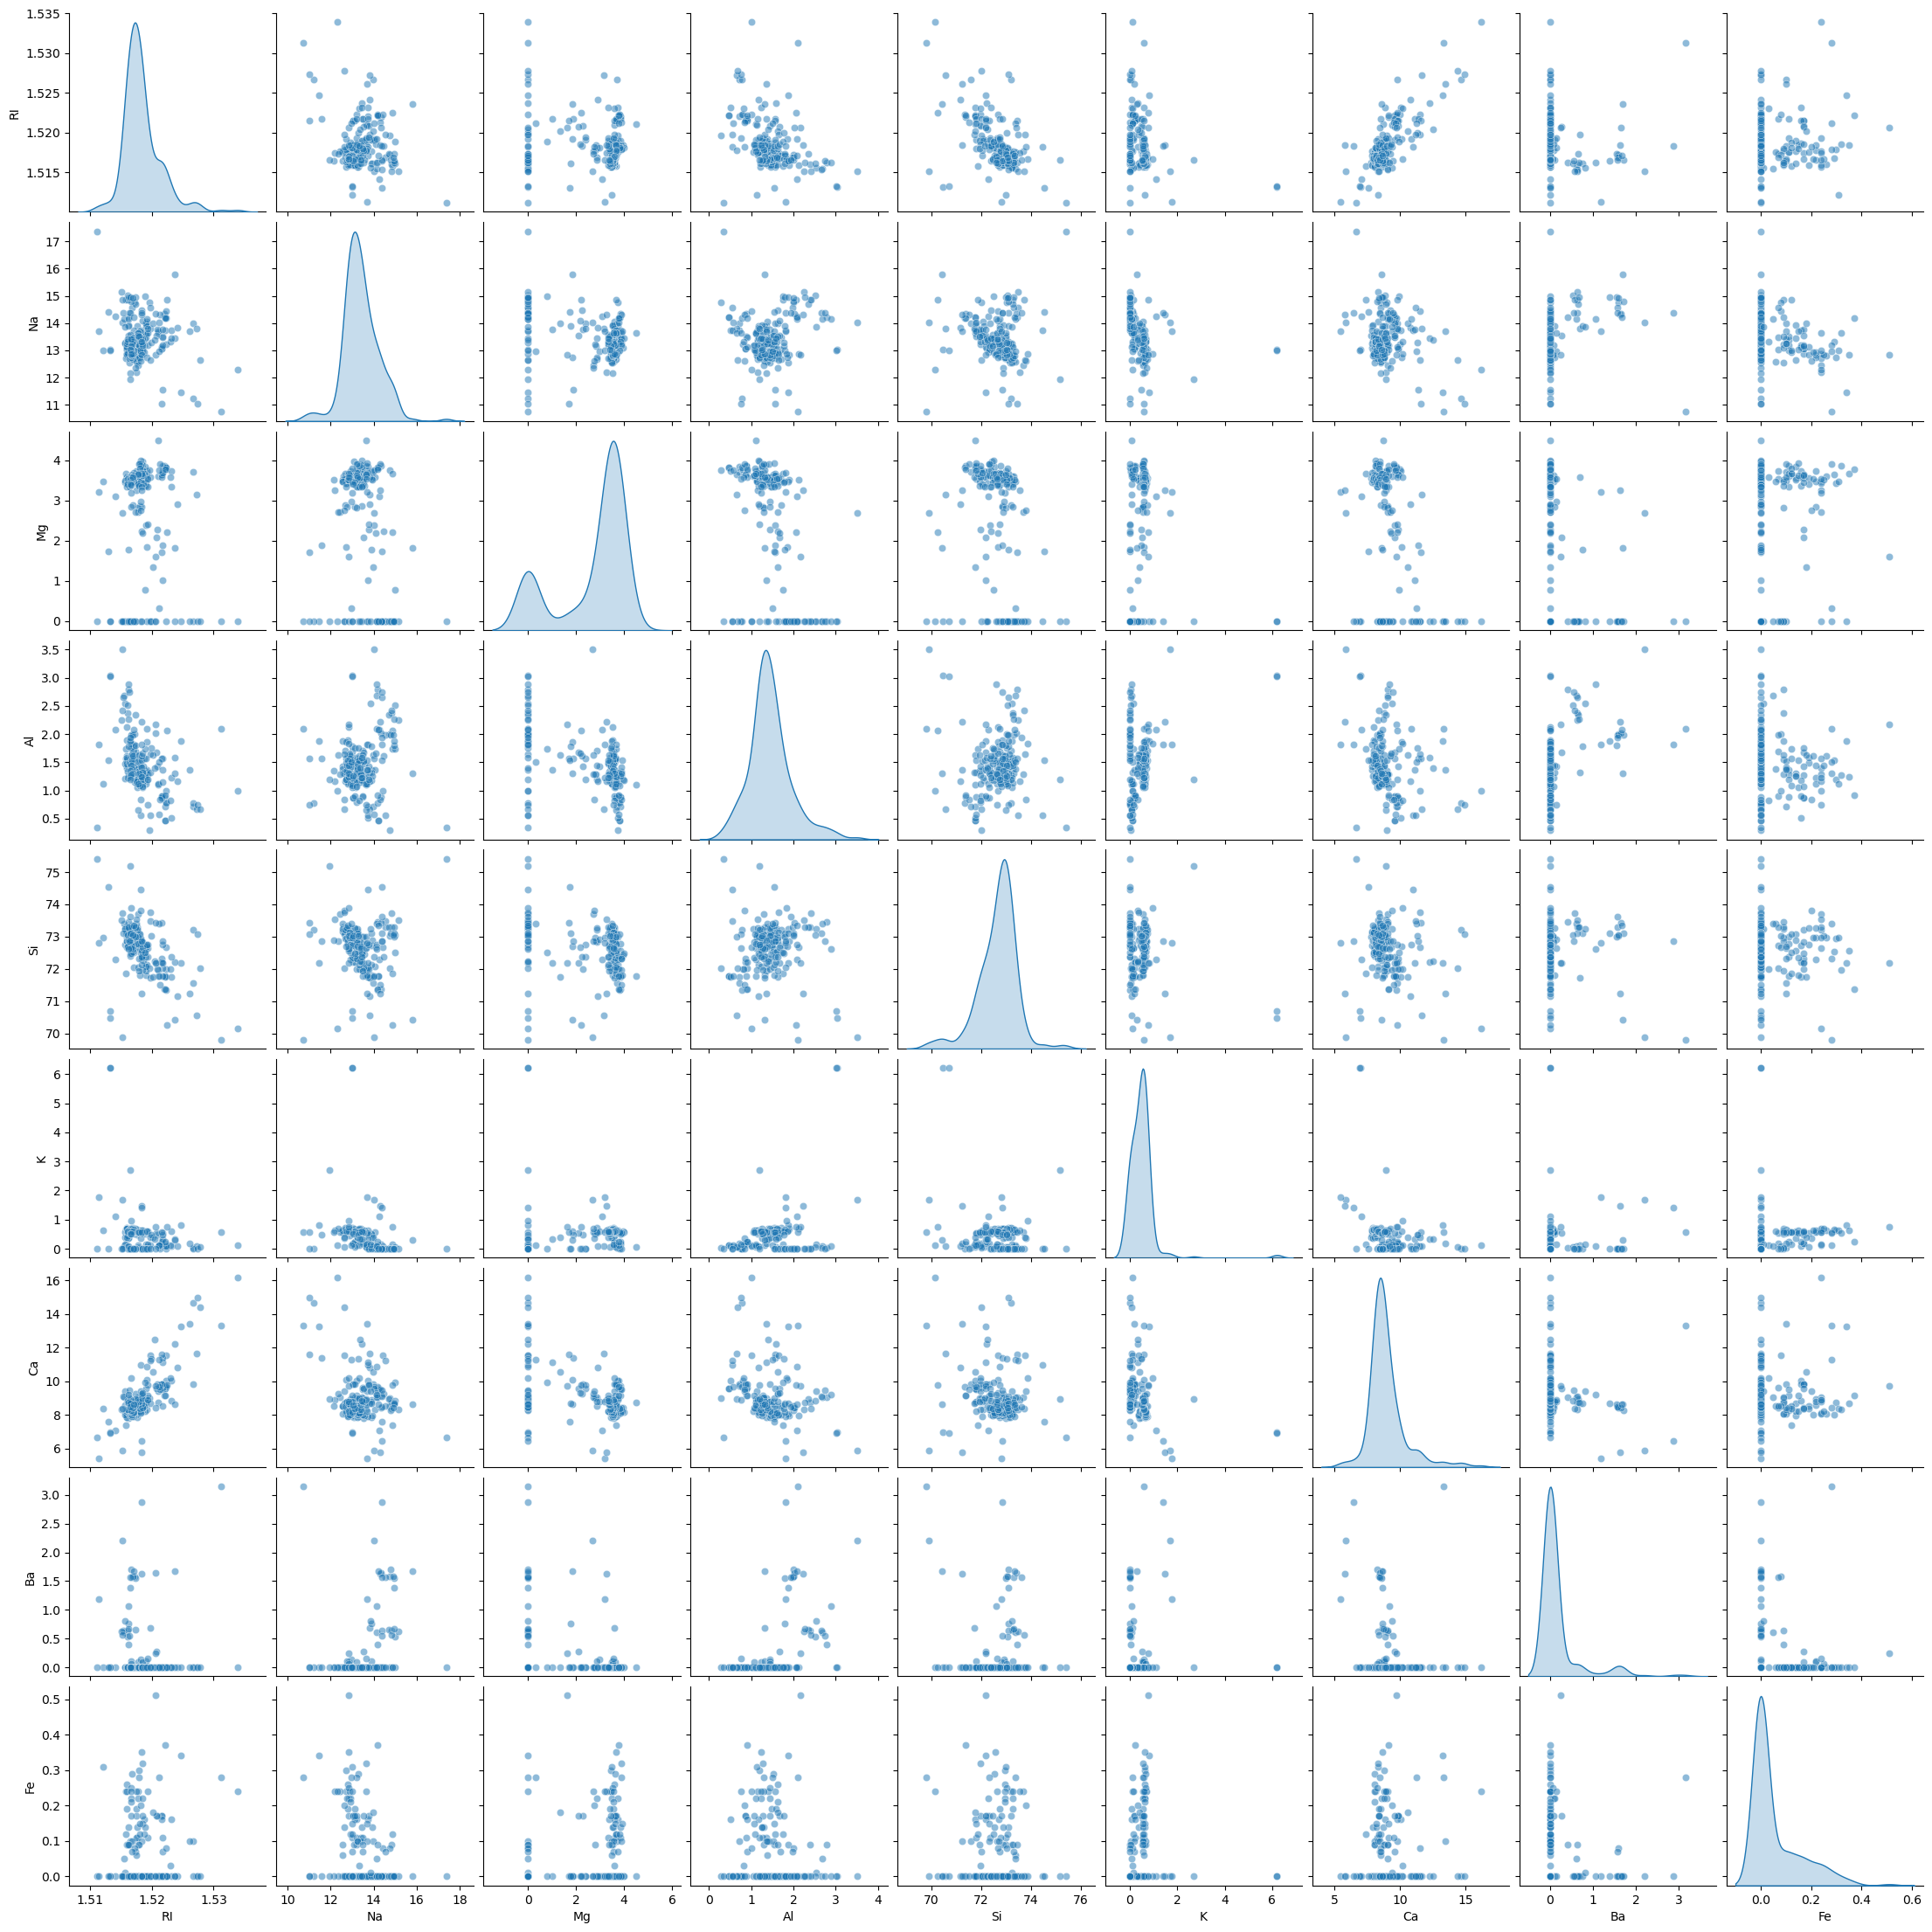

In [8]:
sns.pairplot(
    X,
    diag_kind="kde",
    plot_kws={"alpha": 0.5},
    diag_kws={"fill": True},
)

In [9]:
fig = px.scatter_3d(
    glass, 
    x="RI", 
    y="Na", 
    z="Si", 
    color="Type",
    title="Glass Data Visualization"
)

fig.update_layout(
    template="plotly_white",
    margin=dict(l=0, r=0, b=0, t=0)
)

# Render the plot in the browser
fig.show(renderer="browser")

## Data set two: Pima Indians Diabetes Database

The data set can be obtained from the R package `mlbench`. More specifically, after installing the package, you can obtain the data sets by running

```r
library(mlbench)
data(PimaIndiansDiabetes)
```

For this data set, people are usually interested in predicting the onset of diabetes in female Pima Indians from medical record data.

See [the documentation](https://www.rdocumentation.org/packages/mlbench/versions/0.5-7/topics/PimaIndiansDiabetes).

In [ ]:
diabetes = convert_r_to_pandas(lib = "mlbench", data = "PimaIndiansDiabetes")

# For some reason, the diabetes column is a float with 1.0 and 2.0 values.
diabetes.replace({"diabetes": {2.0: True, 1.0: False}}, inplace=True)

print(diabetes.shape)
diabetes.head()

(768, 9)


C:\Users\codyc\AppData\Local\Temp\ipykernel_20436\3243170485.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,True
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,False
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,False
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,True


In [11]:
diabetes.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [12]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    float64
 1   glucose   768 non-null    float64
 2   pressure  768 non-null    float64
 3   triceps   768 non-null    float64
 4   insulin   768 non-null    float64
 5   mass      768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    float64
 8   diabetes  768 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 48.9 KB


In [13]:
# Binary classification problem

y = diabetes["diabetes"]
X = diabetes.drop(columns=["diabetes"])

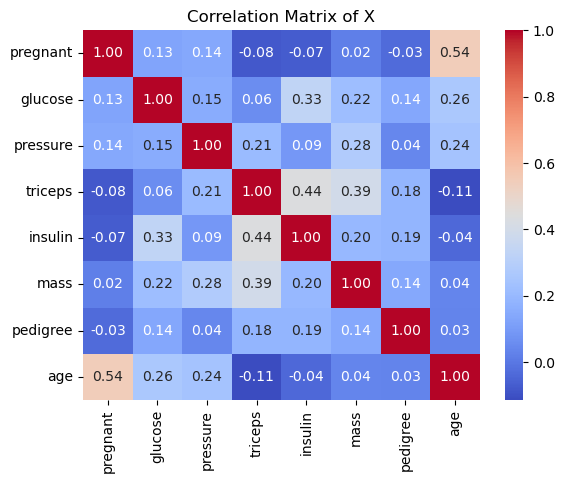

In [14]:
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of X")
plt.show()

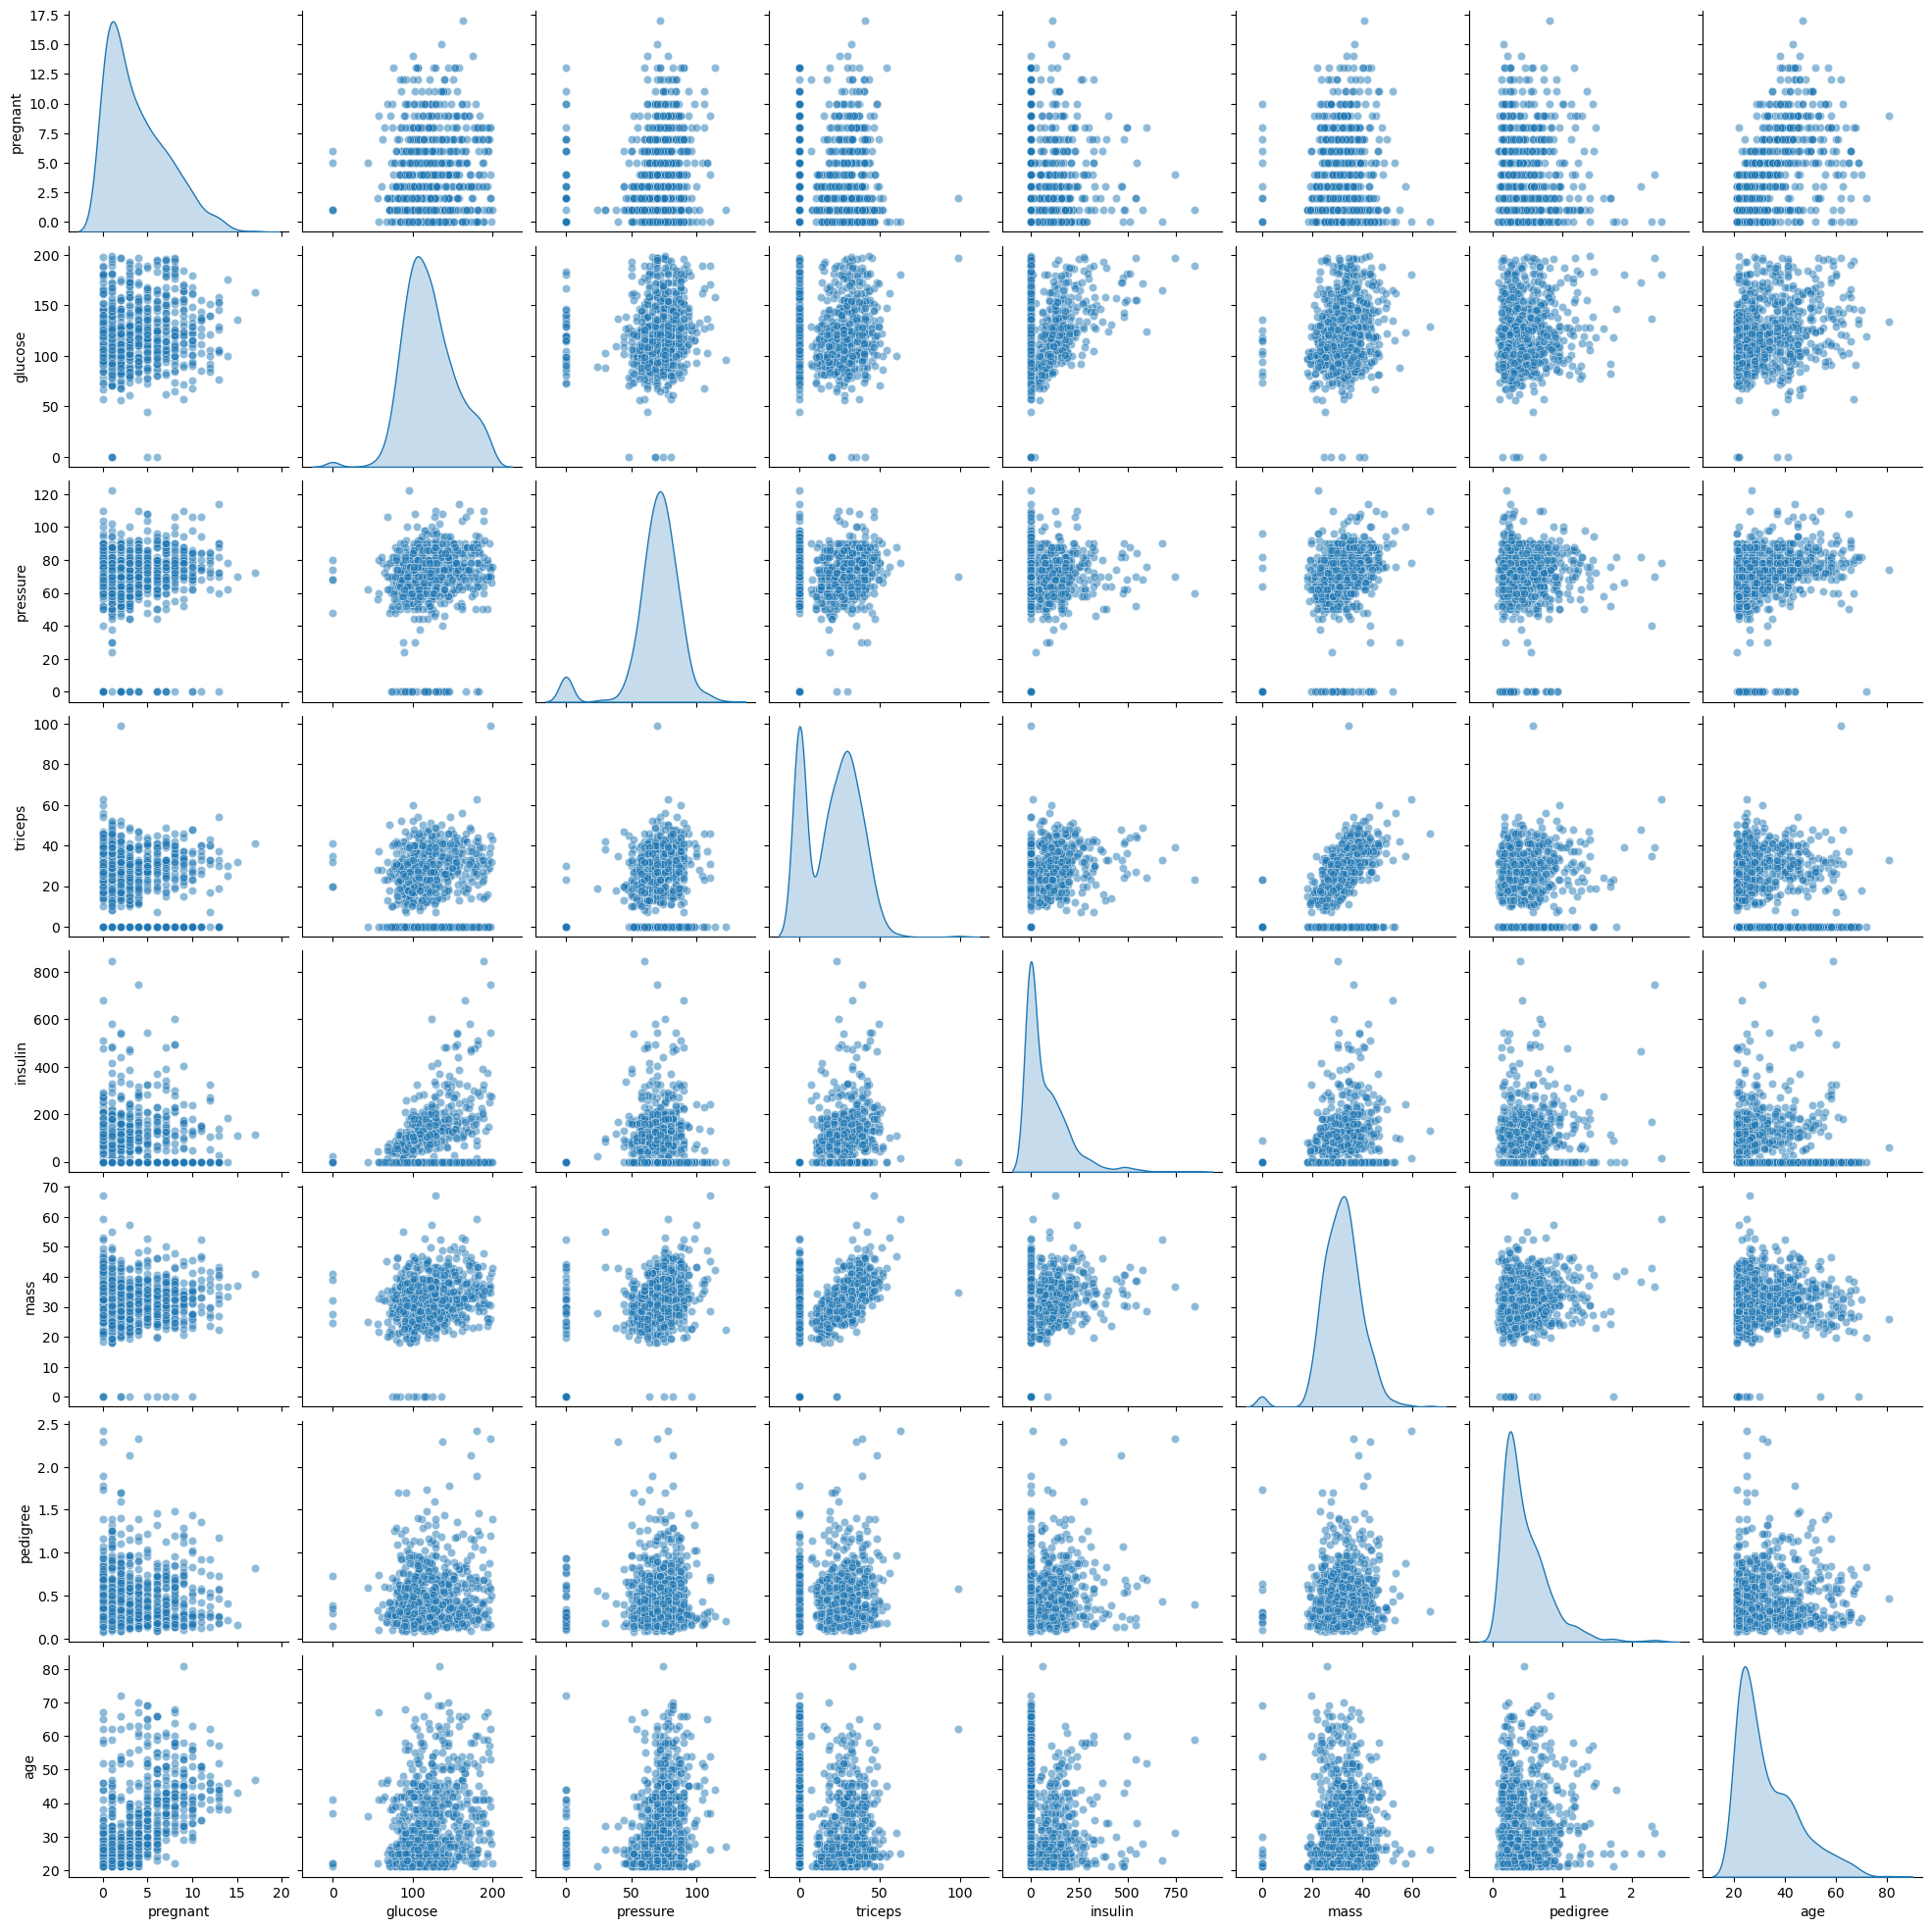

In [15]:
sns.pairplot(
    X,
    diag_kind="kde",
    plot_kws={"alpha": 0.5},
    diag_kws={"fill": True},
)

Can we see apparent clustering on any subset of our features? Not on a subset of three features, at least. 

In [16]:
fig = px.scatter_3d(
    diabetes, 
    x="age", 
    y="pressure", 
    z="glucose", 
    color="diabetes",
    title="Diabetes Data Visualization"
)

fig.update_layout(
    template="plotly_white",
    margin=dict(l=0, r=0, b=0, t=0)
)

# Render the plot in the browser
fig.show(renderer="browser")

## Data set three: Air pollution in US cities

The data set can be obtained from the R package `HSAUR2`. More specifically, after installing the package, you can obtain the data sets by running

```r
library(HSAUR2)
data(USairpollution)
```

For this data set, people are usually interested in understanding which of the climate and human ecology variables are the best predictors of the degree of the air pollution in a city as measured by the sulphur dioxide content of the air. Some people are even interested in ranking the performance of the cities.

See [the documentation](https://www.rdocumentation.org/packages/HSAUR2/versions/1.1-20/topics/USairpollution).

In [17]:
pollution = convert_r_to_pandas(
    lib="HSAUR2",
    data="USairpollution",
    set_index=True
)
print(pollution.shape)
pollution.head()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package 'HSAUR2' was built under R version 4.4.3 



(41, 7)


,SO2,temp,manu,popul,wind,precip,predays
Albany,46.0,47.6,44.0,116.0,8.8,33.36,135.0
Albuquerque,11.0,56.8,46.0,244.0,8.9,7.77,58.0
Atlanta,24.0,61.5,368.0,497.0,9.1,48.34,115.0
Baltimore,47.0,55.0,625.0,905.0,9.6,41.31,111.0
Buffalo,11.0,47.1,391.0,463.0,12.4,36.11,166.0


In [18]:
pollution.describe()

,SO2,temp,manu,popul,wind,precip,predays
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,30.048780,55.763415,463.097561,608.609756,9.443902,36.769024,113.902439
std,23.472272,7.227716,563.473948,579.113023,1.428644,11.771550,26.506419
min,8.000000,43.500000,35.000000,71.000000,6.000000,7.050000,36.000000
25%,13.000000,50.600000,181.000000,299.000000,8.700000,30.960000,103.000000
50%,26.000000,54.600000,347.000000,515.000000,9.300000,38.740000,115.000000
75%,35.000000,59.300000,462.000000,717.000000,10.600000,43.110000,128.000000
max,110.000000,75.500000,3344.000000,3369.000000,12.700000,59.800000,166.000000


In [19]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, Albany to Wilmington
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SO2      41 non-null     float64
 1   temp     41 non-null     float64
 2   manu     41 non-null     float64
 3   popul    41 non-null     float64
 4   wind     41 non-null     float64
 5   precip   41 non-null     float64
 6   predays  41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [20]:
# Regression problem

y = pollution["SO2"]
X = pollution.drop(columns=["SO2"])

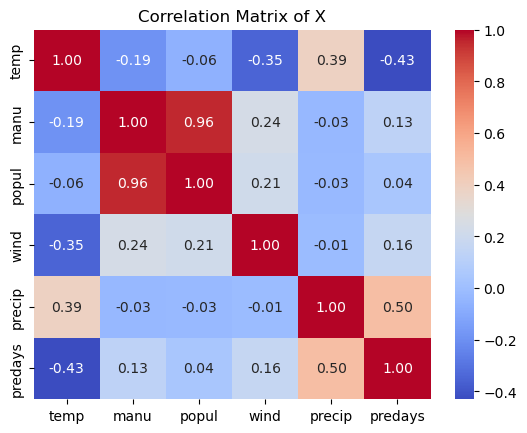

In [21]:
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of X")
plt.show()

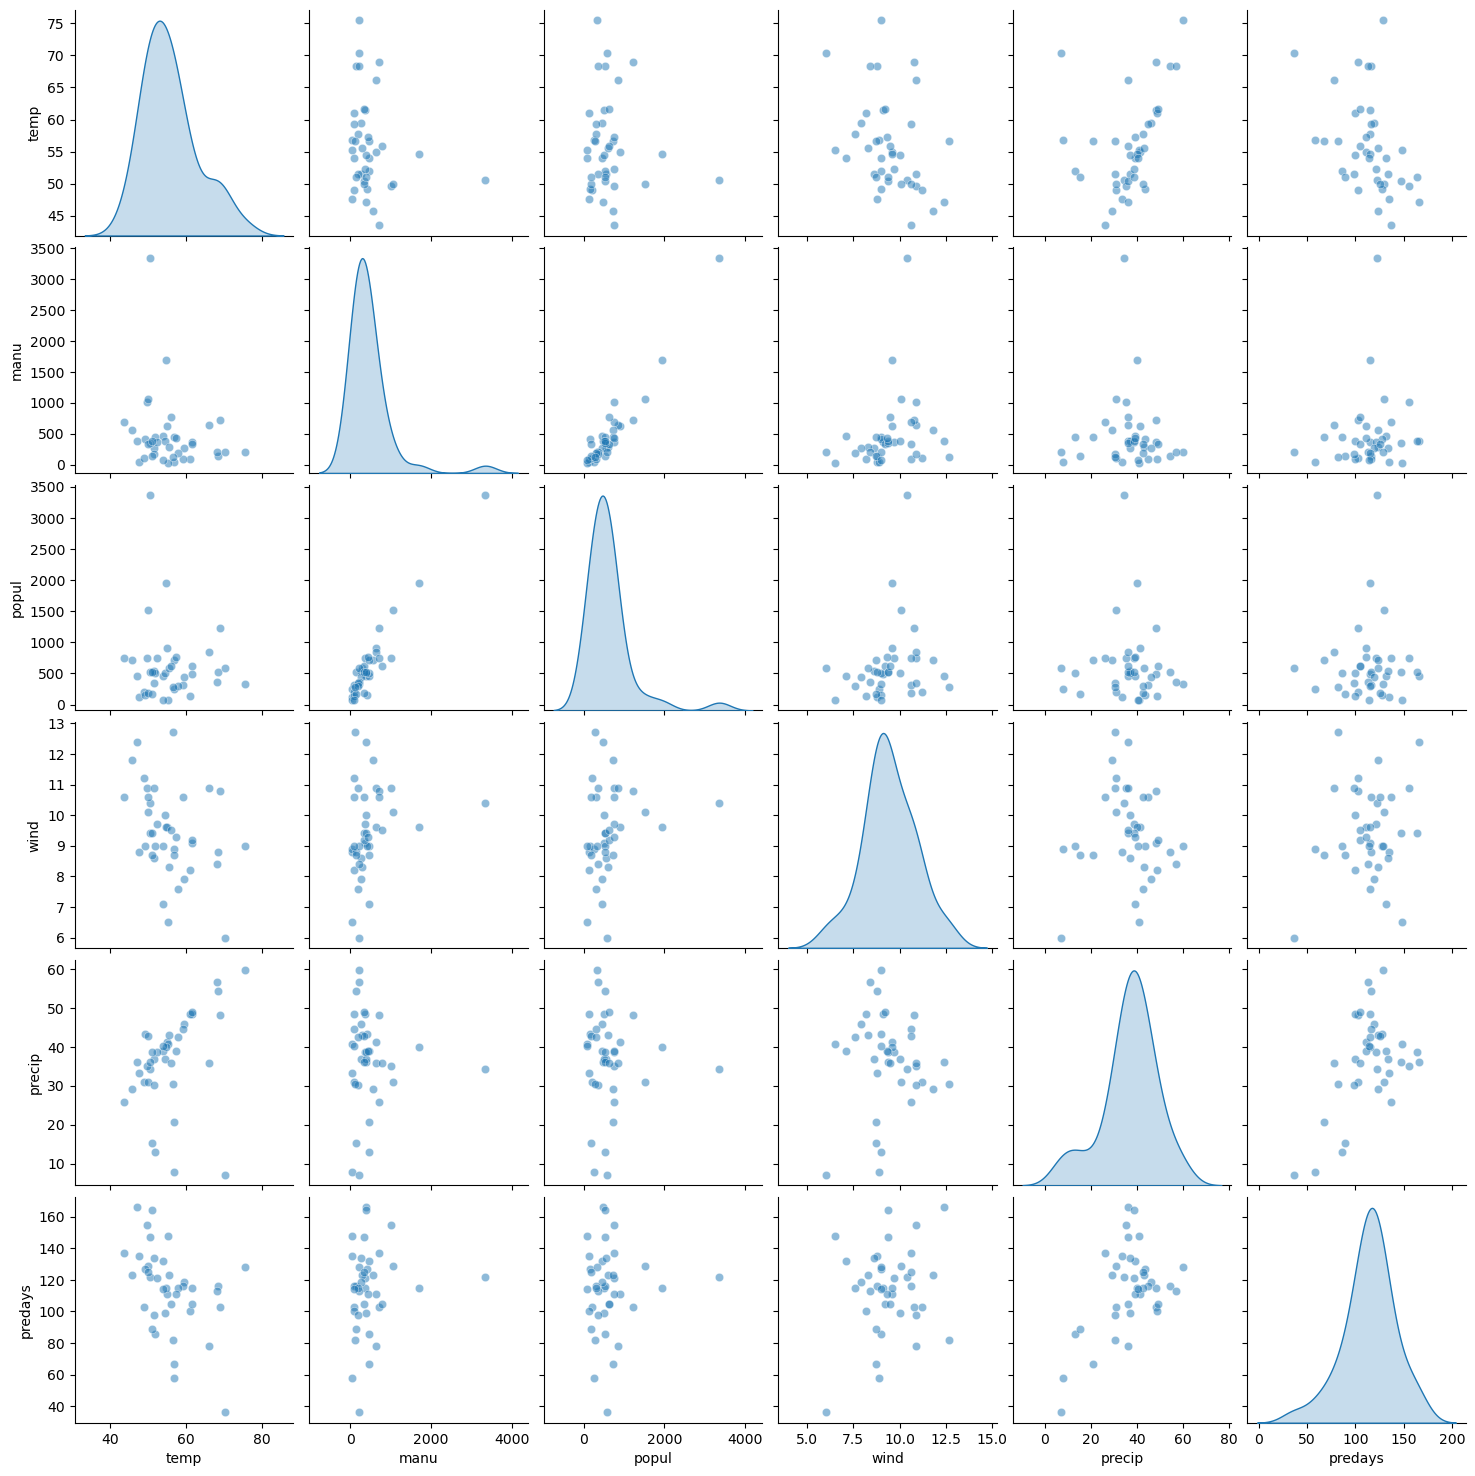

In [22]:
sns.pairplot(
    X,
    diag_kind="kde",
    plot_kws={"alpha": 0.5},
    diag_kws={"fill": True},
)